<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/prediction/stock_predict_bkbr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import matplotlib as pyplot
from sklearn.preprocessing import MinMaxScaler

In [75]:
dataset = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/BKBR3.SA.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-19,17.570000,17.600000,17.020000,17.180000,17.012678,5367900.0
1,2017-12-20,17.160000,17.730000,17.000000,17.450001,17.280048,2352000.0
2,2017-12-21,17.590000,17.590000,17.010000,17.299999,17.131508,1759000.0
3,2017-12-22,17.200001,17.350000,17.049999,17.280001,17.111704,927800.0
4,2017-12-25,17.280001,17.280001,17.280001,17.280001,17.111704,0.0


In [76]:
print('Média Open {0}'.format(dataset['Open'].mean()))
print('Média High {0}'.format(dataset['High'].mean()))
print('Média Low {0}'.format(dataset['Low'].mean()))
print('Média Close {0}'.format(dataset['Close'].mean()))
print('Média Volume {0}'.format(dataset['Volume'].mean()))

Média Open 16.275783638002775
Média High 16.55764212482664
Média Low 15.942260718446603
Média Close 16.247725357836313
Média Volume 1181316.0887656033


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       724 non-null    object 
 1   Open       721 non-null    float64
 2   High       721 non-null    float64
 3   Low        721 non-null    float64
 4   Close      721 non-null    float64
 5   Adj Close  721 non-null    float64
 6   Volume     721 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.7+ KB


In [78]:
dataset = dataset.dropna()

In [80]:
dataset_previsor = dataset.iloc[0:600, 0:8]
dataset_previsor.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
598,2020-05-21,9.89,10.24,9.71,10.10,10.10,1724900.0
599,2020-05-22,9.81,10.03,9.17,9.50,9.50,1889000.0
600,2020-05-25,9.88,10.29,9.47,10.11,10.11,1469200.0
601,2020-05-26,10.70,11.94,10.70,11.63,11.63,5838700.0
602,2020-05-27,11.95,12.50,11.15,12.50,12.50,2760600.0


In [81]:
dataset_previsor.describe()

,Open,High,Low,Close,Adj Close,Volume
count,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,17.293133,17.575500,16.953800,17.265483,17.160450,1.048888e+06
std,3.597041,3.575733,3.610038,3.588088,3.574908,1.072082e+06
min,6.500000,8.120000,6.040000,6.850000,6.850000,0.000000e+00
25%,15.680000,15.887500,15.400000,15.700000,15.547091,4.394500e+05
50%,17.210000,17.445000,16.930000,17.200001,17.085989,7.991500e+05
75%,20.337500,20.625001,20.010000,20.309999,20.200004,1.302000e+06
max,23.780001,24.090000,23.260000,23.799999,23.716709,1.421470e+07


In [97]:
dataset_previsor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 602
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       600 non-null    object 
 1   Open       600 non-null    float64
 2   High       600 non-null    float64
 3   Low        600 non-null    float64
 4   Close      600 non-null    float64
 5   Adj Close  600 non-null    float64
 6   Volume     600 non-null    float64
dtypes: float64(6), object(1)
memory usage: 37.5+ KB


O comportamento da bolsa se manteve tanto na abertura quanto no fechamento sem novidades, basicamente estáveis.

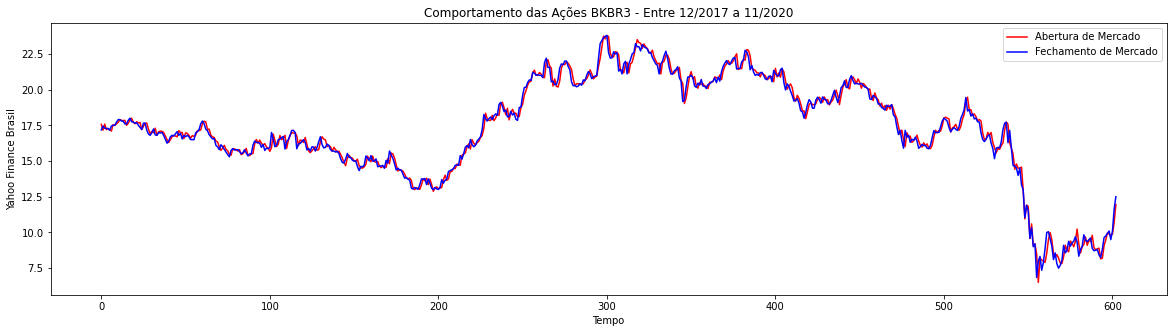

In [85]:
plt = pyplot.pyplot
plt.figure(figsize=(20, 5))
plt.plot(dataset_previsor['Open'], color = 'red', label = 'Abertura de Mercado')
plt.plot(dataset_previsor['Close'], color = 'blue', label = 'Fechamento de Mercado')
plt.title('Comportamento das Ações BKBR3 - Entre 12/2017 a 11/2020')
plt.xlabel('Tempo')
plt.ylabel('Yahoo Finance Brasil')
plt.legend()
plt.show()

In [86]:
treinamento = dataset_previsor.iloc[:, 1:2].values

In [87]:
normalizacao = MinMaxScaler(feature_range = (0,1))
treinamento_normalizado = normalizacao.fit_transform(treinamento)
treinamento_normalizado[0]

array([0.64062496])

In [88]:
treinamento_normalizado.shape

(600, 1)

In [104]:
previsores = []
preco_real = []

for i in range(100, 600):
  previsores.append(treinamento_normalizado[i - 100: i, 0])
  preco_real.append(treinamento_normalizado[i, 0])

In [110]:
len(previsores)

500

In [106]:
len(preco_real)

500

In [111]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [112]:
previsores

array([[0.64062496, 0.61689811, 0.64178237, ..., 0.54918978, 0.54456015,
        0.53124997],
       [0.61689811, 0.64178237, 0.61921298, ..., 0.54456015, 0.53124997,
        0.54629626],
       [0.64178237, 0.61921298, 0.62384261, ..., 0.53124997, 0.54629626,
        0.60127306],
       ...,
       [0.63483787, 0.66666663, 0.66956015, ..., 0.19965277, 0.19618054,
        0.19155091],
       [0.66666663, 0.66956015, 0.66550922, ..., 0.19618054, 0.19155091,
        0.19560184],
       [0.66956015, 0.66550922, 0.66261576, ..., 0.19155091, 0.19560184,
        0.24305554]])

In [113]:
previsores.shape

(500, 100)

In [114]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))
previsores.shape

(500, 100, 1)

In [96]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape = (previsores.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='linear'))

model.compile(optimizer = 'rmsprop', 
              loss = 'mean_squared_error',
              metrics = ['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 200)          240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 200)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 300)          601200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 300)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [22]:
history = model.fit(preditores, preco_real, epochs=1000, batch_size= 32)

Epoch 1/1000
4/4 [==============================] - 1s 220ms/step - loss: 0.2196 - mean_absolute_error: 0.4055
Epoch 2/1000
4/4 [==============================] - 1s 209ms/step - loss: 0.0317 - mean_absolute_error: 0.1565
Epoch 3/1000
4/4 [==============================] - 1s 217ms/step - loss: 0.0087 - mean_absolute_error: 0.0664
Epoch 4/1000
4/4 [==============================] - 1s 222ms/step - loss: 0.0067 - mean_absolute_error: 0.0584
Epoch 5/1000
4/4 [==============================] - 1s 211ms/step - loss: 0.0076 - mean_absolute_error: 0.0653
Epoch 6/1000
4/4 [==============================] - 1s 210ms/step - loss: 0.0078 - mean_absolute_error: 0.0635
Epoch 7/1000
4/4 [==============================] - 1s 203ms/step - loss: 0.0084 - mean_absolute_error: 0.0678
Epoch 8/1000
4/4 [==============================] - 1s 219ms/step - loss: 0.0092 - mean_absolute_error: 0.0727
Epoch 9/1000
4/4 [==============================] - 1s 218ms/step - loss: 0.0086 - mean_absolute_error: 0.0763
E

In [23]:
np.mean(history.history['mean_absolute_error'])

0.025482686337083577

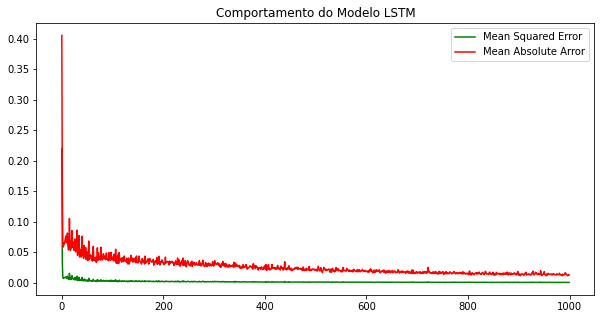

In [29]:
plt = pyplot.pyplot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], color = 'green', label = 'Mean Squared Error')
plt.plot(history.history['mean_absolute_error'], color = 'red', label = 'Mean Absolute Arror')
plt.title('Comportamento do Modelo LSTM')
plt.legend()
plt.show()

In [50]:
dataset_futuro.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
101,2020-05-29,11.69,12.16,10.90,12.16,12.16,5028400.0
102,2020-06-01,11.94,12.03,11.62,11.80,11.80,1573200.0
103,2020-06-02,11.95,12.58,11.78,11.78,11.78,3568800.0
104,2020-06-03,12.05,13.13,11.85,13.00,13.00,3068500.0
105,2020-06-04,12.87,13.54,12.46,13.04,13.04,2242100.0
106,2020-06-05,13.50,14.48,13.25,13.40,13.40,4219200.0
107,2020-06-08,13.56,13.93,13.10,13.93,13.93,3357000.0
108,2020-06-09,13.75,14.48,13.15,14.02,14.02,2309100.0
109,2020-06-10,14.25,14.54,13.28,13.49,13.49,2300500.0
110,2020-06-12,12.48,13.09,12.05,12.30,12.30,2979600.0


In [37]:
dataset_previsor.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,17.950001,17.950001,17.170000,17.350000,17.289284,918500.0
1,2020-01-03,17.040001,17.320000,16.900000,17.049999,16.990332,869200.0
2,2020-01-06,17.320000,17.389999,16.690001,17.230000,17.169703,672700.0
3,2020-01-07,17.400000,17.530001,16.980000,17.340000,17.279318,611800.0
4,2020-01-08,17.570000,17.570000,17.110001,17.230000,17.169703,926300.0


In [51]:
preco_futuro_test = dataset_futuro.iloc[:, 1:2].values

In [52]:
dataset_completo = pd.concat((dataset_previsor['Open'], dataset_futuro['Open']), axis=0)
dataset_completo.shape

(327,)

In [53]:
dataset_completo.head()

0    17.950001
1    17.040001
2    17.320000
3    17.400000
4    17.570000
Name: Open, dtype: float64

In [54]:
entrada_dataset_completo = dataset_completo[len(dataset_completo) - len(dataset_futuro) - 100:].values
entrada_dataset_completo

array([14.25, 12.48, 11.95, 12.16, 12.  , 11.9 , 11.79, 11.58, 11.29,
       11.3 , 10.91, 10.56, 10.42, 10.29, 11.52, 11.49, 10.97, 11.44,
       11.4 , 11.29, 11.5 , 11.42, 12.47, 12.5 , 12.14, 11.94, 11.66,
       11.41, 11.71, 12.02, 11.96, 11.29, 11.25, 11.15, 11.05, 10.94,
       10.88, 10.63, 10.29, 10.13, 10.49, 10.5 , 11.22, 11.  , 11.61,
       10.95, 10.6 , 10.9 , 10.4 , 10.68, 10.26, 10.72, 10.78, 10.73,
       11.45, 11.15, 11.39, 11.3 , 11.08, 11.41, 11.67, 11.43, 11.23,
       11.56, 11.26, 10.94, 10.67, 11.  , 11.08, 11.25, 11.28, 11.31,
       11.1 , 11.35, 10.87, 11.  , 11.21, 10.94, 10.51, 10.7 , 10.92,
       10.85, 10.71, 10.52, 10.36, 10.51, 10.6 , 10.8 , 10.49, 10.94,
       10.7 , 10.65, 10.75, 11.03, 11.48, 11.  , 10.65, 10.39, 10.11,
        9.99, 11.69, 11.94, 11.95, 12.05, 12.87, 13.5 , 13.56, 13.75,
       14.25, 12.48, 11.95, 12.16, 12.  , 11.9 , 11.79, 11.58, 11.29,
       11.3 , 10.91, 10.56, 10.42, 10.29, 11.52, 11.49, 10.97, 11.44,
       11.4 , 11.29,

In [55]:
entrada_dataset_completo = entrada_dataset_completo.reshape(-1, 1)
entrada_dataset_completo.shape

(219, 1)

In [56]:
entrada_dataset_completo = normalizacao.transform(entrada_dataset_completo)

In [57]:
dataset_futuro.shape

(119, 7)

In [59]:
x_futuro = []

for i in range(100, dataset_futuro.shape[0]):
  x_futuro.append(entrada_dataset_completo[i - 100: i, 0])

x_futuro = np.array(x_futuro)
x_futuro

array([[0.59753281, 0.46106403, 0.4202005 , ..., 0.29992292, 0.27833464,
        0.26908252],
       [0.46106403, 0.4202005 , 0.43639171, ..., 0.27833464, 0.26908252,
        0.40015423],
       [0.4202005 , 0.43639171, 0.42405555, ..., 0.26908252, 0.40015423,
        0.41942948],
       ...,
       [0.34464151, 0.38087898, 0.37779494, ..., 0.41634544, 0.40786433,
        0.39167312],
       [0.38087898, 0.37779494, 0.36931383, ..., 0.40786433, 0.39167312,
        0.36931383],
       [0.37779494, 0.36931383, 0.38550504, ..., 0.39167312, 0.36931383,
        0.37008484]])

In [60]:
x_futuro.shape

(19, 100)

In [62]:
x_futuro = np.reshape(x_futuro, (x_futuro.shape[0], x_futuro.shape[1], 1))
x_futuro.shape

(19, 100, 1)

In [63]:
previsao = model.predict(x_futuro)
previsao.shape

(19, 1)

In [64]:
previsao = normalizacao.inverse_transform(previsao)
previsao.mean()

11.444869

In [65]:
preco_futuro_test.mean()

11.2218487394958

In [66]:
preco_futuro_test.mean() - previsao.mean()

-0.2230203019470718

In [67]:
resultado_final = pd.DataFrame(list(zip(previsao, preco_futuro_test)), columns=['Previsão', 'Preço Real'])
resultado_final.head()

,Previsão,Preço Real
0,[10.258845],[11.69]
1,[10.500024],[11.94]
2,[10.8666],[11.95]
3,[11.253059],[12.05]
4,[11.528957],[12.87]


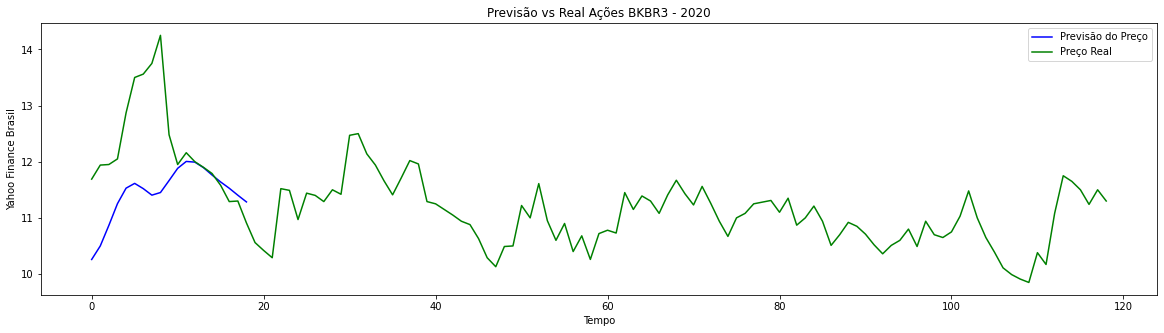

In [74]:
plt = pyplot.pyplot
plt.figure(figsize=(20, 5))
plt.plot(previsao, color = 'blue', label = 'Previsão do Preço')
plt.plot(preco_futuro_test, color = 'green', label = 'Preço Real')
plt.title('Previsão vs Real Ações BKBR3 - 2020')
plt.xlabel('Tempo')
plt.ylabel('Yahoo Finance Brasil')
plt.legend()
plt.show()